In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


# Notebook to investigate the performance of spike interface in localizing neurons 

In [2]:
import MEArec as mr # what we will use to create a synthetic recording
import spikeinterface.full as si  # what we will use to sort the spikes

import warnings
from probeinterface.plotting import plot_probe
from matplotlib import cm
from probeinterface import read_prb

import time
import numpy as np

In [3]:
recording = mr.load_recordings('temporary_files_locationsrecordingsFake_probe.h5')
positions = np.hstack((recording.template_locations[:, 1:3], recording.template_locations[:, 0][:, np.newaxis]))


In [4]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_comparison_positions
recording, gt_sorting = si.read_mearec('temporary_files_locationsrecordingsFake_probe.h5')
recording_f = si.bandpass_filter(recording)
recording_f = si.common_reference(recording_f)
recording_f = si.zscore(recording_f)

/home/pierre/.local/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:228: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  interpolation: int = Image.BILINEAR,
/home/pierre/.local/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:295: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
/home/pierre/.local/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:311: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
/home/pierre/.local/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:328: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC in

In [5]:
job_kwargs = {'n_jobs' : -1, 'chunk_memory' : '10M'}
benchmarks = []
waveforms = None
for method in ['center_of_mass', 'monopolar_triangulation']:
    if method == 'center_of_mass':
        for feature in ['ptp', 'energy', 'v_origin']:
            title = f'CoM ({feature})'
            params = {'feature' : feature}
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms
            bench.run(method, params)
            waveforms = bench.waveforms
            benchmarks.append(bench)
    elif method == 'monopolar_triangulation':
        for do_decrease in [True, False]:
            if do_decrease:
                title = f'Monopolar (with decrease)'
            else:
                title =  f'Monopolar (without decrease)'
            params = {'enforce_decrease': do_decrease}
            bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
            if waveforms is not None:
                bench.waveforms = waveforms
            bench.run(method, params)
            waveforms = bench.waveforms
            benchmarks.append(bench)
    

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

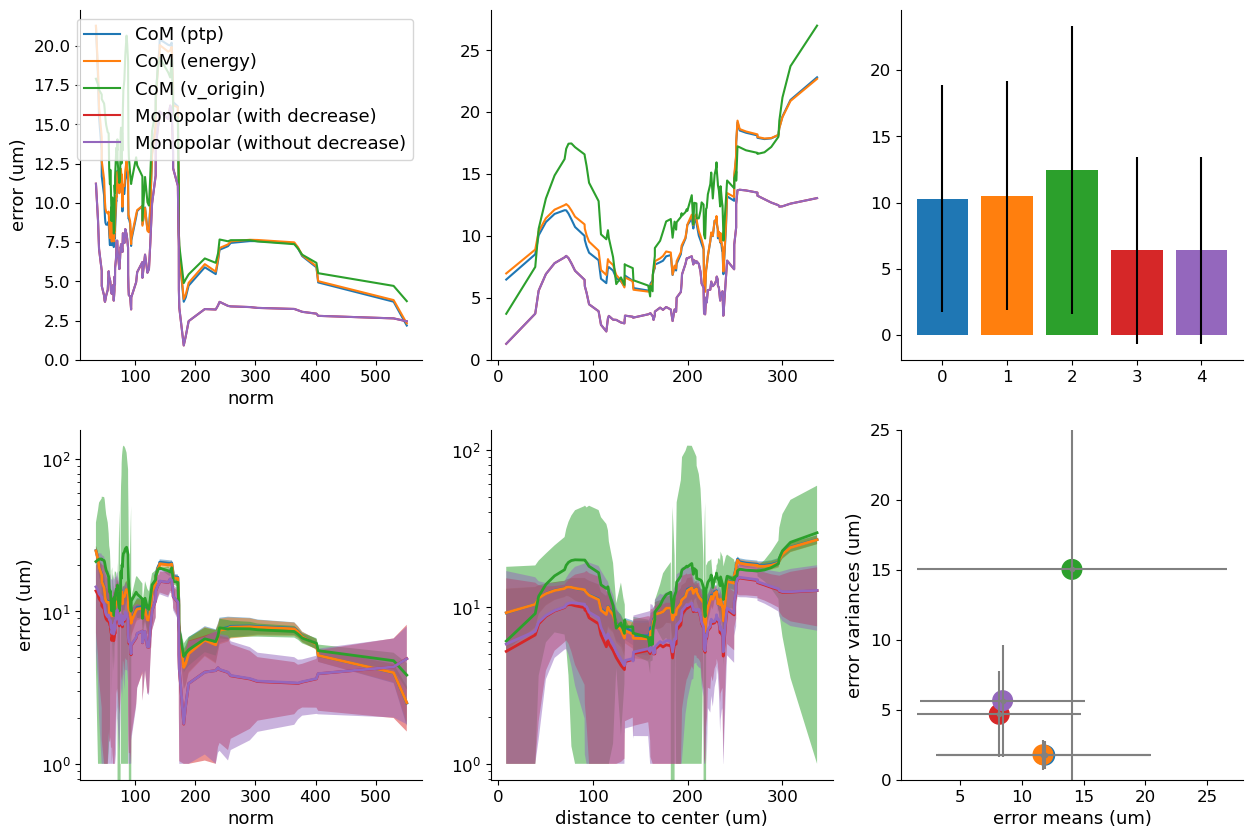

In [6]:
plot_comparison_positions(benchmarks)
import pylab as plt
plt.savefig('comparison.pdf')

In [7]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_figure_1

A Jupyter Widget

A Jupyter Widget

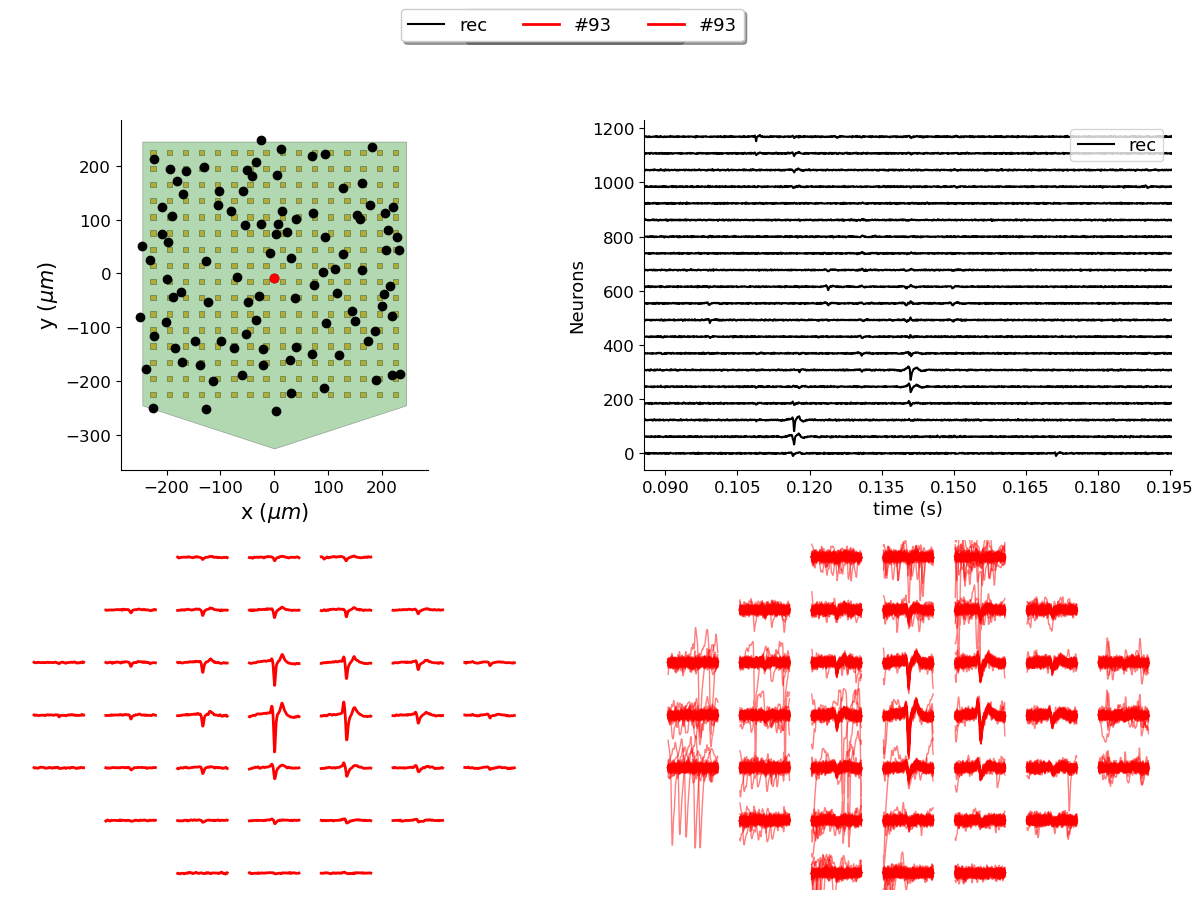

In [141]:
plot_figure_1(benchmarks[0])
import pylab as plt
plt.savefig('illustration.pdf')

In [8]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import BenchmarkPeakLocalization, plot_comparison_inferences

/tmp/ipykernel_124095/1045525437.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


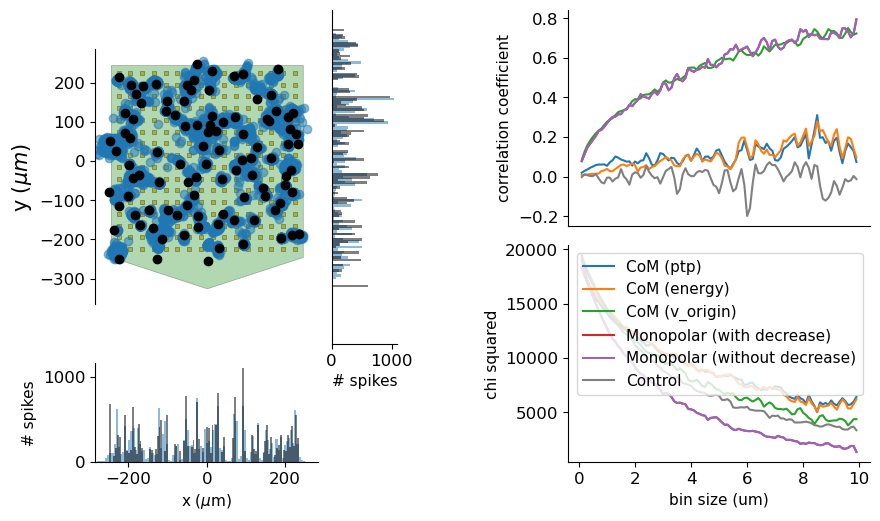

In [241]:
plot_comparison_inferences(benchmarks)
plt.tight_layout()
plt.savefig('impact.pdf')

In [15]:
from spikeinterface.sortingcomponents.benchmark.benchmark_peak_localization import plot_comparison_precision

In [18]:
benchmarks_2 = []
for method in ['monopolar_triangulation']:
    for t_range in [0.25, 0.5, 0.75, 1, 1.25, 1.5]:
        title = f'Monopolar (with decrease) {t_range}ms'
        params = {'enforce_decrease': do_decrease, 'ms_before' : t_range, 'ms_after' : t_range}
        bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
        if waveforms is not None:
            bench.waveforms = waveforms    
        bench.run(method, params)
        waveforms = bench.waveforms
        benchmarks_2.append(bench)
    

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [37]:
#benchmarks_3 = []
for method in ['monopolar_triangulation']:
    for r_range in [30]:
        title = f'Monopolar (with decrease) {r_range}um'
        params = {'enforce_decrease': do_decrease, 'local_radius_um' : r_range}
        bench = BenchmarkPeakLocalization(recording_f, gt_sorting, positions, job_kwargs=job_kwargs, title=title)
        if waveforms is not None:
            bench.waveforms = waveforms    
        bench.run(method, params)
        waveforms = bench.waveforms
        benchmarks_3.append(bench)
    

A Jupyter Widget

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


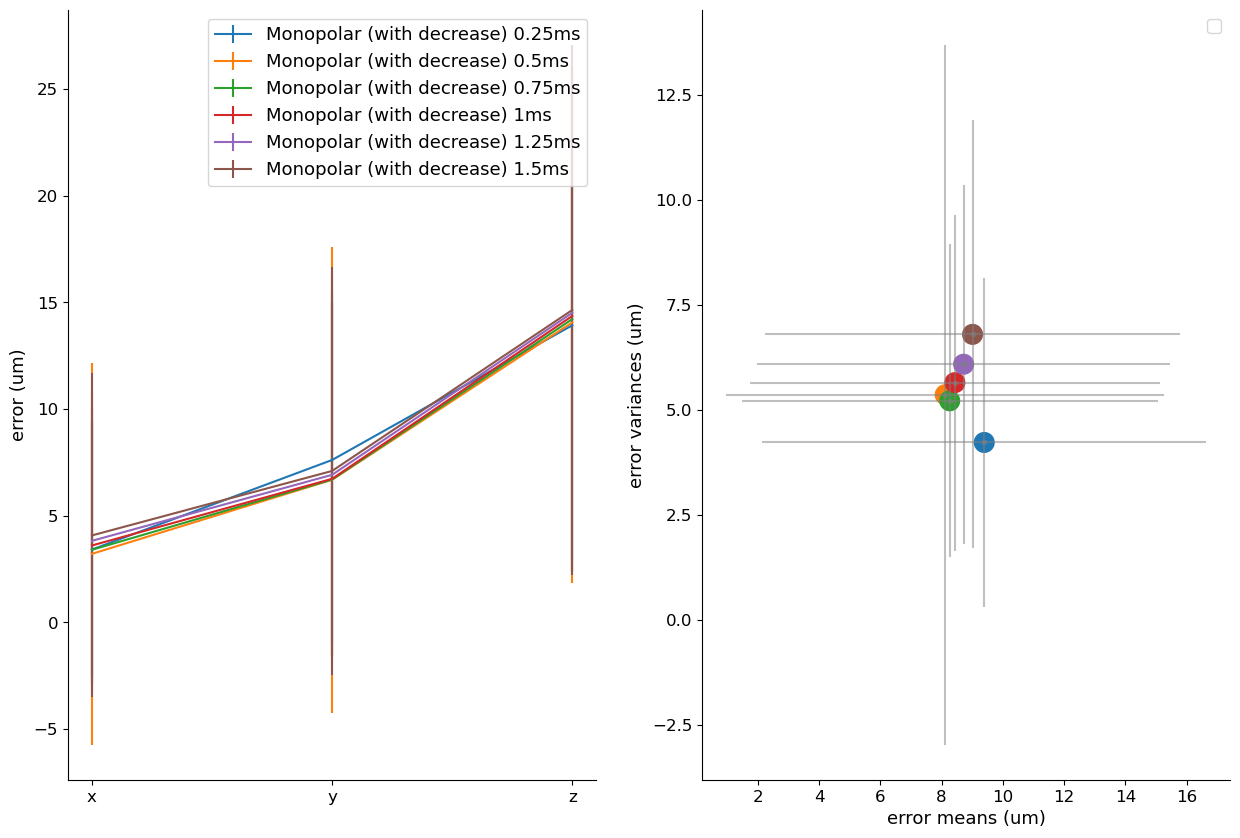

In [35]:
plot_comparison_precision(benchmarks_2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


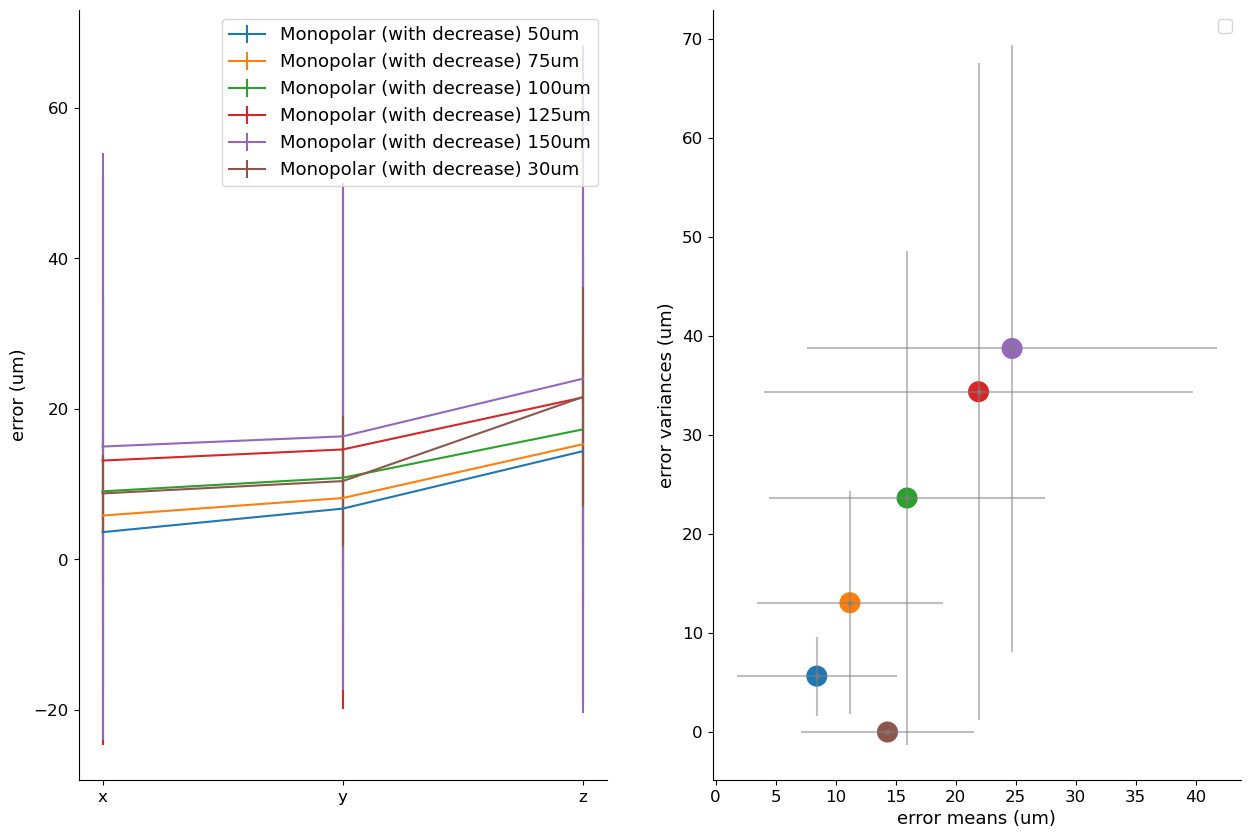

In [38]:
plot_comparison_precision(benchmarks_3)